# Homework 2: Programming

The following notebook contains skeleton-code for answering problems 2 and 3 of homework assignment 2. Please read through each cell carefully to understand what is expected to be implemented. For your final submission, please try to clean up any intermediate outputs used for debugging.

### Imports

You should be able to complete the entire assignment using only the following imports. Please consult the course staff if you are unsure about whether additional packages may be used.

In [ ]:
## Import Packages
import random
import numpy as np
import matplotlib.pyplot as plt

## Question 2


Below we provide an AutoGrad class named `Value`. The basic idea is to store the existing computational map during the creation of each `Value`, and calculate the gradient using backpropagation when one of the `Value` calls `backward()` method.

The `backward()` function will arange the computational graph and backpropagate the gradients. All you need to do is to implement all the operations with its corresponding `_backward` function. We have provided the `__add__` function (sum of two nodes) as an example to help get you started.

This notebook is designed in a Object Oriented way, if you are not farmiliar with the Object Oriented Programming in Python, you can refer to:

(1) https://realpython.com/python3-object-oriented-programming/

(2) https://docs.python.org/3/tutorial/classes.html


In [ ]:
class Value:

    """
    Basic unit of storing a single scalar value and its gradient
    """

    def __init__(self, data, _children=()):
        """

        """
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._backward = lambda: None

    def __add__(self, other):
        """
        Example implementation of a single class operation (addition)

        Args:
            other (Any): Node to add with the class

        Returns:
            out (callable): Function to referesh the gradient
        """
        #Firstly, convert some default value type in python to Value
        #Then do operations with two or more Value object
        other = other if isinstance(other, Value) else Value(other)

        #Secondly, create a new Value object which is the result of the operation
        out = Value(self.data + other.data, (self, other))

        #Thirdly, create a _backward function for the output object to refresh
        # the gradient of its _childrens,
        #Then assign this _backward function to the output object.
        def _backward():
            self.grad += out.grad * 1.0
            other.grad += out.grad * 1.0
        out._backward = _backward

        return out

    def __mul__(self, other):
        """
        Multiplication operation (e.g. Value(3) * Value(2) = Value(6))
        """
        other = other if isinstance(other, Value) else Value(other)

        out = Value(self.data * other.data, (self, other))

        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
        out._backward = _backward

        return out

    def __pow__(self, other):
        """
        Power operation (e.g Value(3) ** 2 = Value(9))
        """
        #We don't need to convert the exponent to Value
        assert isinstance(other, (int, float))

        out = Value(self.data ** other, (self,))

        def _backward():
            self.grad += out.grad * other * (self.data ** (other - 1))
        out._backward = _backward

        return out

    def relu(self):
        """
        ReLU activation function applied to the current Value
        """
        out = Value(self.data if self.data > 0 else 0, (self,))

        def _backward():
            self.grad += out.grad * (1 if self.data > 0 else 0)
        out._backward = _backward

        return out


    def exp(self):
        """
        Exponentiate the current Value (e.g. e ^ Value(0) = Value(1))
        """
        #TODO implement the exponential function for and treat the value as exponent.
        #The base is natural e, you can use numpy to calculate the value of the exponential.
        out = Value(np.exp(self.data), (self,))

        def _backward():
            self.grad += out.grad * np.exp(self.data)
        out._backward = _backward

        return out

    def log(self):
        """
        Take the natural logarithm (base e) of the current Value
        """
        #TODO implement the logarithm function for and treat the value as exponent.
        #The bottom number should be e, you can use numpy to calculate the value of the logarithm.
        out = Value(np.log(self.data), (self,))

        def _backward():
            self.grad += out.grad / self.data
        out._backward = _backward

        return out

    def backward(self):
        """
        Run backpropagation from the current Value
        """
        #This function is called when you start backpropagation from this Value

        #The gradient of this value is initialized to 1 for you.
        self.grad = 1

        #You need to find a right topological order all of the children in the graph.
        #As for topology sort, you can refer to http://www.cs.cornell.edu/courses/cs312/2004fa/lectures/lecture15.htm

        topo = []
        '''
        Hint: you can recursively visit all non-visited node from the node calling backward.
        add one node to the head of the list after all of its children node are visited
        '''
        def explore_children(current, visited, topo):
            visited.add(current)
            for child in current._prev:
                if child not in visited:
                    explore_children(child, visited, topo)
            topo.append(current)


        #List to track the visited nodes
        visited = set()
        #Explore every node
        explore_children(self, visited, topo)
        topo.reverse()
        #go one variable at a time and apply the chain rule to get its gradient
        for v in topo:
            v._backward()

    # We handled the negation and reverse operations for you
    def __neg__(self): # -self
        """
        Negate the current Value
        """
        return self * -1

    def __radd__(self, other): #other + self
        """
        Reverse addition operation (ordering matters in Python)
        """
        return self + other

    def __sub__(self, other): # self - other
        """
        Subtraction operation
        """
        return self + (-other)

    def __rsub__(self, other): # other - self
        """
        Reverse subtraction operation
        """
        return other + (-self)

    def __rmul__(self, other): # other * self
        """
        Reverse multiplication operation
        """
        return self * other

    def __truediv__(self, other): # self / other
        """
        Division operation
        """
        return self * other**-1

    def __rtruediv__(self, other): # other / self
        """
        Reverse diction operation
        """
        return other * self**-1

    def __repr__(self):
        """
        Class representation (instead of unfriendly memory address)
        """
        return f"Value(data={self.data}, grad={self.grad})"

Now, we are going to use the simple example in q1.b to get you familar with the usage of this class.

If your implementation is correct, you will get the same values and gradients as your hand-caculated ones.

Be careful! Even you get this test case right, it does not guarantee the correctness of your implementation.

In [15]:
## Initialize Example Values (From Written Assignment)
print("Forward Pass (Values):")
w1 = Value(0.2)
print("w1 = %.2f" % w1.data)
w2 = Value(0.4)
print("w2 = %.2f" % w2.data)
x1 = Value(-0.4)
print("x1 = %.2f" % x1.data)
x2 = Value(0.5)
print("x2 = %.2f" % x2.data)

## Compute the intermediate values
w1_sqrd = w1 ** 2
print("w1^2 = %.2f" % w1_sqrd.data)
w2_sqrd = w2 ** 2
print("w2^2 = %.2f" % w2_sqrd.data)
w1_sqrd_plus_w2_sqrd = w1_sqrd + w2_sqrd
print("w1^2 + w2^2 = %.2f" % w1_sqrd_plus_w2_sqrd.data)
half_w1_sqrd_plus_w2_sqrd = w1_sqrd_plus_w2_sqrd * Value(0.5)
print("0.5 * (w1^2 + w2^2) = %.2f" % half_w1_sqrd_plus_w2_sqrd.data)
x1_times_w1 = x1 * w1
print("x1 * w1 = %.2f" % x1_times_w1.data)
x2_times_w2 = x2 * w2
print("x2 * w2 = %.2f" % x2_times_w2.data)
x1_times_w1_plus_x2_times_w2 = x1_times_w1 + x2_times_w2
print("x1 * w1 + x2 * w2 = %.2f" % x1_times_w1_plus_x2_times_w2.data)
sigmoid_pt_1 = x1_times_w1_plus_x2_times_w2 * Value(-1)
print("-(x1 * w1 + x2 * w2) = %.2f" % sigmoid_pt_1.data)
sigmoid_pt_2 = sigmoid_pt_1.exp()
print("e^-(x1 * w1 + x2 * w2) = %.2f" % sigmoid_pt_2.data)
sigmoid_pt_3 = sigmoid_pt_2 + Value(1)
print("1 + e^-(x1 * w1 + x2 * w2) = %.2f" % sigmoid_pt_3.data)
sigmoid_pt_4 =  sigmoid_pt_3 ** -1
print("1 / (1 + e^-(x1 * w1 + x2 * w2)) = %.2f" % sigmoid_pt_4.data)
f = sigmoid_pt_4 + half_w1_sqrd_plus_w2_sqrd
print("1 / (1 + e^-(x1 * w1 + x2 * w2)) + 0.5 * (w1^2 + w2^2) = %.2f" % f.data)


##Backpropagation
f.backward()

print()
print("Backward Pass (Gradients):")
print("1 / (1 + e^-(x1 * w1 + x2 * w2)) + 0.5 * (w1^2 + w2^2) gradient = %.2f" % f.grad)
print("1 / (1 + e^-(x1 * w1 + x2 * w2)) gradient = %.2f" % sigmoid_pt_4.grad)
print("1 + e^-(x1 * w1 + x2 * w2) gradient = %.2f" % sigmoid_pt_3.grad)
print("e^-(x1 * w1 + x2 * w2) gradient = %.2f" % sigmoid_pt_2.grad)
print("-(x1 * w1 + x2 * w2) gradient = %.2f" % sigmoid_pt_1.grad)
print("x1 * w1 + x2 * w2 gradient = %.2f" % x1_times_w1_plus_x2_times_w2.grad)
print("x2 * w2 gradient = %.2f" % x2_times_w2.grad)
print("x1 * w1 gradient = %.2f" % x1_times_w1.grad)
print("0.5 * (w1^2 + w2^2) gradient = %.2f" % half_w1_sqrd_plus_w2_sqrd.grad)
print("w1^2 + w2^2 gradient = %.2f" % w1_sqrd_plus_w2_sqrd.grad)
print("w2^2 gradient = %.2f" % w2_sqrd.grad)
print("w1^2 gradient = %.2f" % w1_sqrd.grad)
print("w1 gradient = %.2f" % w1.grad)
print("w2 gradient = %.2f" % w2.grad)
print("x1 gradient = %.2f" % x1.grad)
print("x2 gradient = %.2f" % x2.grad)

x = Value(0.63)
w1 = Value(0.25)
w2 = Value(-0.11)
w3 = Value(0.78)
h = Value(128)
s1 = (1 + (-x * w1).exp()) ** -1
s2 = (1 + (-s1 * w2).exp()) ** -1
y = s2 * w3
L = (h - y) ** 2
print(y)
L.backward()
print(L)
print(y.grad)
print(w1.grad)
print(w2.grad)
print(w3.grad)


Forward Pass (Values):
w1 = 0.20
w2 = 0.40
x1 = -0.40
x2 = 0.50
w1^2 = 0.04
w2^2 = 0.16
w1^2 + w2^2 = 0.20
0.5 * (w1^2 + w2^2) = 0.10
x1 * w1 = -0.08
x2 * w2 = 0.20
x1 * w1 + x2 * w2 = 0.12
-(x1 * w1 + x2 * w2) = -0.12
e^-(x1 * w1 + x2 * w2) = 0.89
1 + e^-(x1 * w1 + x2 * w2) = 1.89
1 / (1 + e^-(x1 * w1 + x2 * w2)) = 0.53
1 / (1 + e^-(x1 * w1 + x2 * w2)) + 0.5 * (w1^2 + w2^2) = 0.63

Backward Pass (Gradients):
1 / (1 + e^-(x1 * w1 + x2 * w2)) + 0.5 * (w1^2 + w2^2) gradient = 1.00
1 / (1 + e^-(x1 * w1 + x2 * w2)) gradient = 1.00
1 + e^-(x1 * w1 + x2 * w2) gradient = -0.28
e^-(x1 * w1 + x2 * w2) gradient = -0.28
-(x1 * w1 + x2 * w2) gradient = -0.25
x1 * w1 + x2 * w2 gradient = 0.25
x2 * w2 gradient = 0.25
x1 * w1 gradient = 0.25
0.5 * (w1^2 + w2^2) gradient = 1.00
w1^2 + w2^2 gradient = 0.50
w2^2 gradient = 0.50
w1^2 gradient = 0.50
w1 gradient = 0.10
w2 gradient = 0.52
x1 gradient = 0.05
x2 gradient = 0.10
Value(data=0.37843553907524874, grad=0)
Value(data=16287.26371545397, grad=1)
-25

## Question 3

### Implementation of the linear layer
You will implement a `LinearLayer` module here.

We provide the initialization of the class `LinearLayer`. You need to implement the forward function -- Return the results - `out` with the shape `[n_samples, n_out_channels]` of a linear layer when the the data `x` shaped `[n_samples, n_in_channels]` is fed into it.


In [ ]:
class Module:

    """
    Base Model Module
    """

    def parameters(self):
        """

        """
        return []

    def zero_grad(self):
        """

        """
        for p in self.parameters():
            p.grad = 0

class LinearLayer(Module):

    """
    Linear Layer
    """

    def __init__(self, nin, nout):
        """
        Here we randomly initilize the weights w as 2-dimensional list of Values
        And b as 1-dimensional list of Values with value 0

        You may use this stucture to implement the __call__ function
        """
        self.w = []
        for i in range(nin):
            w_tmp = [Value(random.uniform(-1,1)) for j in range(nout)]
            self.w.append(w_tmp)
        self.b = [Value(0) for i in range(nout)]
        self.nin = nin
        self.nout = nout

    def __call__(self, x):
        """
        Args:
            x (2d-list): Two dimensional list of Values with shape [batch_size , nin]

        Returns:
            xout (2d-list): Two dimensional list of Values with shape [batch_size, nout]
        """
        #Establish dimensions
        batch_size = len(x)
        assert self.nin == len(x[0])
        nin = self.nin
        nout = self.nout

        #Create xout (y_hat)
        xout = [[Value(0) for i in range(nout)] for j in range(batch_size)]

        #Iterate through the batches
        for batch in range(batch_size):
            #Iterate through the columns in w
            for value in range(nout):
                dp = Value(0)
                #Iterate through the elements in x
                for feature in range(nin):
                    dp = dp + x[batch][feature] * self.w[feature][value]
                #Insert the dot product in xout
                xout[batch][value] = dp + self.b[value]

        return xout

    def parameters(self):
        """
        Get the list of parameters in the Linear Layer

        Args:
            None

        Returns:
            params (list): List of parameters in the layer
        """
        return [p for row in self.w for p in row] + [p for p in self.b]

Test your implementation of linear layer, the error should be nearly 0.

In [ ]:
## Initialization of Layer with Weights
linear_model_test = LinearLayer(4, 4)
linear_model_test.w = [[Value(data=0.7433570245252463), Value(data=-0.9662164096144394), Value(data=-0.17087204941322653), Value(data=-0.5186656374983067)],
                       [Value(data=-0.1414882837892344), Value(data=-0.5898971049017006), Value(data=-0.3448340220492381), Value(data=0.5278833226346107)],
                       [Value(data=0.3990701306597799), Value(data=-0.3319058654296163), Value(data=-0.784797384411202), Value(data=0.7603317495966846)],
                       [Value(data=-0.5711035064293541), Value(data=-0.0001937643033362857), Value(data=0.12693226232877053), Value(data=-0.36044237239197097)]]
linear_model_test.b = [Value(data=0), Value(data=0), Value(data=0), Value(data=0)]

## Forward Pass
x_test = [[-0.17120438454836173, -0.3736077734087335, -0.48495413054653214, 0.8269206715993096]]
y_hat_test = linear_model_test(x_test)
y_ref = [[Value(data=-0.7401928625441141), Value(data=0.5466095223360173), Value(data=0.6436403600545564), Value(data=-0.7752067527386406)]]

## Error Calculation
predict_error = 0
for i in range(4):
    predict_error += (y_hat_test[0][i] - y_ref[0][i])**2
print(predict_error.data)

0.0


### Implementation of Loss functions

You will implement softmax, cross entropy loss, and accuracy here for further use

In [ ]:
def softmax(y_hat):
    """
    Softmax computation

    Args:
        y_hat (2d-list): 2-dimensional list of Values with shape [batch_size, n_class]

    Returns:
        s (2d-list): 2-dimensional list of Values with the same shape as y_hat
    """
    #Establish dimensions
    batch_size = len(y_hat)
    n_class = len(y_hat[0])

    #Size s
    s = [[Value(0) for i in range(n_class)] for j in range(batch_size)]

    #Iterate through the batches
    for batch in range(batch_size):
        sum = Value(0)
        #Sum up the exponentiated values
        for value in range(n_class):
            sum += y_hat[batch][value].exp()
            s[batch][value] = y_hat[batch][value].exp()
        #Divide each value by the sum
        for value in range(n_class):
            s[batch][value] *= (sum ** -1)

    return s

In [ ]:
def cross_entropy_loss(y_hat, y):
    """
    Cross-entropy Loss computation

    Args:
        y_hat (2d-list): Output from linear function with shape [batch_size, n_class]
        y (1d-list): List of ground truth labels with shape [batch_size, ]

    Returns:
        loss (Value): Loss value of type Value
    """
    #Establish dimensions
    batch_size = len(y_hat)
    n_class = len(y_hat[0])

    #Run softmax and initialize the loss
    s = softmax(y_hat)
    loss = Value(0)

    #Iterate through the batches
    for batch in range(batch_size):
        #Calculate the cross-entropy loss for the true class
        loss -= s[batch][y[batch]].log()

    return loss / batch_size

In [ ]:
def accuracy(y_hat, y):
    """
    Accuracy computation

    Args:
        y_hat (2d-list): Output from linear function with shape [batch_size, n_class]
        y (1d-list): List of ground truth labels with shape [batch_size, ]

    Returns:
        acc (float): Accuracy score
    """
    #Establish dimensions
    batch_size = len(y_hat)
    n_class = len(y_hat[0])

    #Initialize the accuracy
    acc = 0

    #Iterate through the batches
    for batch in range(batch_size):
        max = y_hat[batch][0].data
        max_index = 0
        #Find the predicted value/class
        for value in range(n_class):
            if (y_hat[batch][value].data > max):
                max = y_hat[batch][value].data
                max_index = value
        #Add to the accuracy if the max is the true class
        if (max_index == y[batch]):
            acc += 1

    return acc / batch_size

Test the implementation of `softmax()` and `cross_entropy_loss()` as well as the gradient calculation of `Value` class. The errors should be nearly 0.

In [ ]:
## Ground Truth + Forward Pass
y_gt = [1]
y_hat_test = linear_model_test(x_test)

## Softmax Calculation
prob_test = softmax(y_hat_test)
prob_ref = [[0.10441739448437284, 0.37811510516540814, 0.4166428991676558, 0.10082460118256342]]
softmax_error = 0
for i in range(4):
    softmax_error += (prob_ref[0][i] - prob_test[0][i])**2
print(softmax_error.data)

## Cross Entropy Loss Calculation
loss_test = cross_entropy_loss(y_hat_test, y_gt)
loss_ref = Value(data=0.9725566186970217)
print((loss_test - loss_ref).data)

## Update Gradient Based on Loss
linear_model_test.zero_grad()
loss_test.backward()
w_gradient_ref = [[-0.017876715758840547, 0.10646942068007896, -0.07133109112844363, -0.01726161379279479],
                  [-0.0390111502584479, 0.23234103087567629, -0.1556610258645873, -0.03766885475264107],
                  [-0.05063764675610328, 0.30158564847453107, -0.2020526949142369, -0.04889530680419089],
                  [0.08634490197366762, -0.5142494748940867, 0.3445306259968013, 0.08337394692361787]]
b_gradient_ref = [0.10441739448437282, -0.6218848948345919, 0.4166428991676557, 0.1008246011825634]

## Compute Error
w_gradient_error = 0
b_gradient_error = 0
for i in range(4):
    b_gradient_error += (linear_model_test.b[i].grad - b_gradient_ref[i]) ** 2
    for j in range(4):
        w_gradient_error += (linear_model_test.w[i][j].grad - w_gradient_ref[i][j]) ** 2
print(w_gradient_error)
print(b_gradient_error)

0.0
0.0
6.355568816477878e-33
1.232595164407831e-32


Implement the following functions to visualize the ground truth and the decision boundary in the same figure.

In [ ]:
def plot_points(X, Y, scale, n, data):
    """
    Plot points in the visualization image
    """
    points_color = [[0., 0. , 255.], [255., 0., 0.], [0., 255., 0.],[0., 0. , 0.]]

    for i in range(X.shape[0]):
        x1 = int(((X[i][0] + scale) * n) / (2 * scale))
        x2 = int(((X[i][1] + scale) * n) / (2 * scale))

        if (Y[i] == 0):
            data[x1][x2] = [0., 0. , 255.]
        elif (Y[i] == 1):
            data[x1][x2] = [255., 0., 0.]
        elif (Y[i] == 2):
            data[x1][x2] = [0., 255., 0.]
        elif (Y[i] == 3):
            data[x1][x2] = [0., 0. , 0.]

    return data


def plot_background(scale, n, model):
    """
    Color the background in the visualization image
    """

    background_color = [[0., 191., 255.], [255., 110., 180.], [202., 255., 112.],[156., 156., 156.]]

    data = np.zeros((n,n,3), dtype='uint8')

    for i in range(n):
        x1 = -scale + 2 * scale / n * i
        for j in range(n):
            x2 = -scale + 2 * scale / n * j
            input = [[Value(x1),Value(x2)]]

            output = model(input)
            batch_size = len(input)
            n_class = len(output[0])
            for batch in range(batch_size):
                max = output[batch][0].data
                max_index = 0
                for value in range(n_class):
                    if (output[batch][value].data > max):
                        max = output[batch][value].data
                        max_index = value
                data[i][j] = background_color[max_index]
    return data


def visualization(X, Y, model):
    """
    Decision boundary visualization
    """
    scale = 4.5  # the scale of X axis and Y axis. To say, x is from -scale to +scale
    n = 300      # seperate the image into n*n pixels

    data = plot_background (scale, n, model)
    data = plot_points (X, Y, scale, n, data)

    plt.imshow(data)
    plt.axis('off')
    plt.show()

if you implement the plot function correctly, you will get some image like:

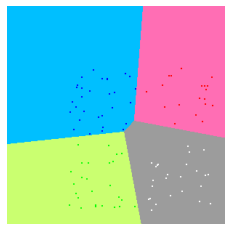


### Implementation of training procedure

With input data `x`, ground_truth `y`, and `model` as parameters, implement the gradient descent method to train your model and plot loss and accuracy vs training iterations

In [ ]:
def train(x,
          y,
          model,
          loss_function=cross_entropy_loss,
          accuracy_function=accuracy,
          max_iteration=500,
          learning_rate=1):
    """
    Args:
       x (2-d list): List of Values with shape: [n_samples, n_channels]
       y (1-d list): List of integers with shape: [n_samples]
       model (Module): Linear model
       loss_function (callable): Loss function to use during training
       accuracy_function (callable): Function used for calculating training accuracy
       max_iteration (int): Number of epochs to train model for
       learning_rate (numeric): Step size of the gradient update
    """
    for i in range(max_iteration):
        #Run the model and calculate loss and accuracy
        y_hat = model(x)
        loss = cross_entropy_loss(y_hat, y)
        acc = accuracy(y_hat, y)

        #Backpropagate and run gradient descent
        model.zero_grad()
        loss.backward()
        for param in model.parameters():
            param.data += -learning_rate * param.grad

        #Then plot the loss / accuracy vs iterations.
        if i % 20 == 19:
            print("iteration",i,"loss:",loss.data, "accuracy:",acc)
        ## record loss
        if i == 0 :
        # initialize L
            L = loss.data
            A = acc
        else:
            L = np.append(L,loss.data)
            A = np.append(A,acc)

    ## Plot Loss and Accuracy
    fig0=plt.figure(0)
    plt.plot(L,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Loss', fontsize=16)
    plt.show()
    fig1=plt.figure(1)
    plt.plot(A,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Accuracy', fontsize=16)
    plt.show()


### Train the model

Load the data, format it, instantiate your model and start training!

(100, 2) (100,) [0 1 2 3]
iteration 19 loss: 0.5575293074033779 accuracy: 0.95
iteration 39 loss: 0.41478320456409207 accuracy: 0.96
iteration 59 loss: 0.34615115143033864 accuracy: 0.97
iteration 79 loss: 0.30352753794800474 accuracy: 0.98
iteration 99 loss: 0.27367246572792087 accuracy: 0.98
iteration 119 loss: 0.2512167697927196 accuracy: 0.98
iteration 139 loss: 0.23350573662394747 accuracy: 0.99
iteration 159 loss: 0.21905393047781516 accuracy: 0.99
iteration 179 loss: 0.20695603719452926 accuracy: 0.99
iteration 199 loss: 0.19662448618298484 accuracy: 0.99
iteration 219 loss: 0.18765902206110535 accuracy: 0.99
iteration 239 loss: 0.17977629417838048 accuracy: 0.99
iteration 259 loss: 0.17276931736718013 accuracy: 0.99
iteration 279 loss: 0.16648288988880444 accuracy: 0.99
iteration 299 loss: 0.1607980378127385 accuracy: 0.99
iteration 319 loss: 0.15562181282160867 accuracy: 0.99
iteration 339 loss: 0.15088039410992407 accuracy: 1.0
iteration 359 loss: 0.14651430015323658 accuracy

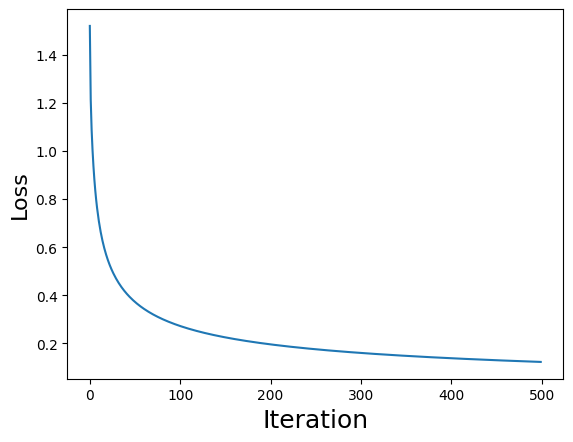

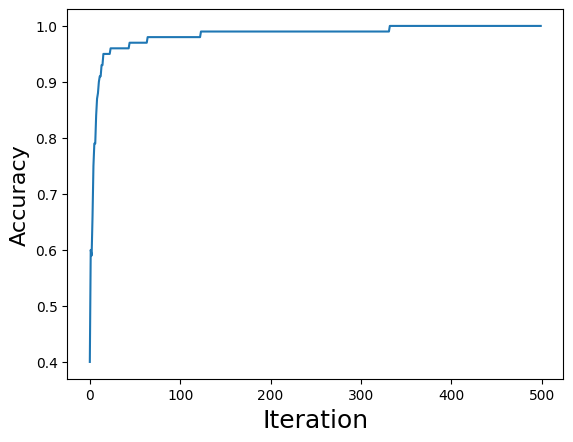

In [ ]:
## Load Q3 Dataset
datapath = './Q3_data.npz'
data = np.load(datapath)

## Load Data and Parse Shape Information
X = data['X']
Y = data['Y']
print(X.shape, Y.shape, np.unique(Y))
nin = X.shape[1]
nout = np.max(Y) + 1

## Initialize data using your Value class
x = [[Value(v) for v in sample] for sample in X]
y = [int(v) for v in Y]

## Initialize a Linear Model
linear_model = LinearLayer(nin, nout)

## Train the Model using Your Data
train(x, y, linear_model)

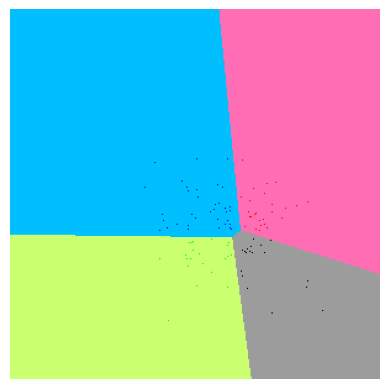

In [ ]:
## Visualize learned decision boundaries
visualization(X, Y, linear_model)

## Question 4

### a) Is this dataset linear separable?
load the dataset for this question and train a linear model on this dataset and report the performance

In [ ]:
## Load Q4 Dataset
datapath = './Q4_data.npz'
data = np.load(datapath)

## Parse Data and Identify Dimensions
X = data['X']
Y = data['Y']
nin = X.shape[1]
nout = int(np.max(Y)) + 1

## Initialize data using your value class
x = [[Value(v) for v in sample] for sample in X]
y = [int(v) for v in Y]

iteration 19 loss: 0.3800079075553965 accuracy: 0.8
iteration 39 loss: 0.3591481460632672 accuracy: 0.8
iteration 59 loss: 0.35112780793014414 accuracy: 0.825
iteration 79 loss: 0.34659189717673344 accuracy: 0.825
iteration 99 loss: 0.3436390872921257 accuracy: 0.825
iteration 119 loss: 0.3415724616731084 accuracy: 0.825
iteration 139 loss: 0.34005970376373684 accuracy: 0.825
iteration 159 loss: 0.3389181735180508 accuracy: 0.825
iteration 179 loss: 0.3380377346773479 accuracy: 0.85
iteration 199 loss: 0.33734736987730385 accuracy: 0.85
iteration 219 loss: 0.33679894652930514 accuracy: 0.85
iteration 239 loss: 0.3363586008336948 accuracy: 0.85
iteration 259 loss: 0.3360018238455035 accuracy: 0.85
iteration 279 loss: 0.3357104848669176 accuracy: 0.85
iteration 299 loss: 0.33547093647883236 accuracy: 0.85
iteration 319 loss: 0.335272758711217 accuracy: 0.85
iteration 339 loss: 0.3351078996855912 accuracy: 0.85
iteration 359 loss: 0.33497007237135557 accuracy: 0.85
iteration 379 loss: 0.3

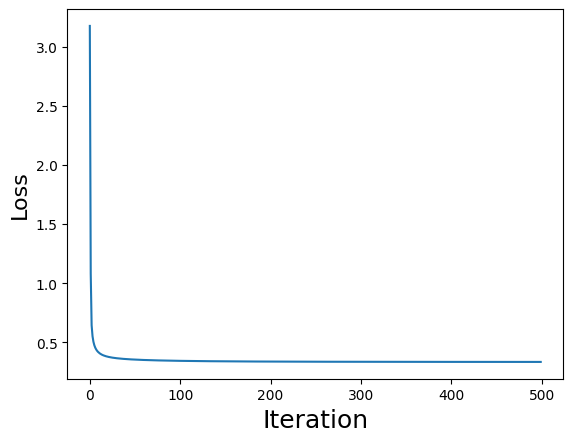

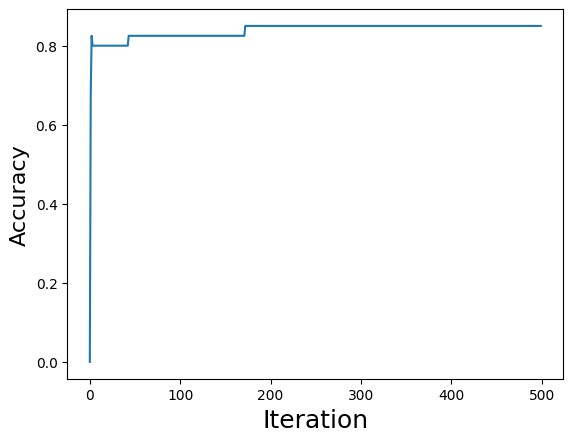

In [ ]:
## Initialize Linear Model
linear_model = LinearLayer(nin, nout)

## Train Model
train(x, y, linear_model)

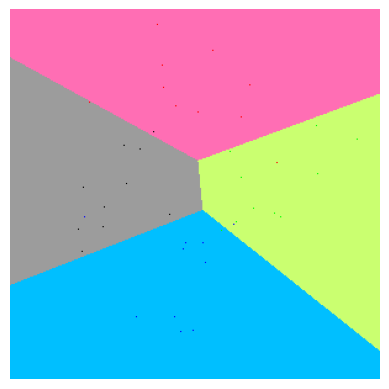

In [ ]:
## Visualize Learned Decision Boundary
visualization(X, Y, linear_model)

### b) Implementation of Multi Layer Perceptron (MLP)

Implement a class `MLP` to add arbitrary layers. You will need to implement the forward function to return results `out` with `x` fed into the model.

In [ ]:
class MLP(Module):

    """
    Multi Layer Perceptron
    """
    def __init__(self, dimensions):
        """
        Initialize multiple layers here in the list named self.linear_layers
        """
        assert isinstance(dimensions, list)
        assert len(dimensions) > 2
        self.linear_layers = []
        for i in range(len(dimensions) - 1):
            self.linear_layers.append(LinearLayer(dimensions[i], dimensions[i+1]))

    def __call__(self, x):
        """
        Args:
            x (2d-list): Two dimensional list of Values with shape [batch_size , nin]

        Returns:
            xout (2d-list): Two dimensional list of Values with shape [batch_size, nout]
        """

        #Iterate through the batches
        for num, layer in enumerate(self.linear_layers):
            xout = layer(x)
            #Apply ReLU to all but the last layer
            if (num != len(self.linear_layers) - 1):
                for i in range(len(xout)):
                    for j in range(len(xout[0])):
                        xout[i][j] = xout[i][j].relu()
            x = xout
        return xout

    def parameters(self):
        """
        Get the parameters of each layer

        Args:
            None

        Returns:
            params (list of Values): Parameters of the MLP
        """
        return [p for layer in self.linear_layers for p in layer.parameters()]

    def zero_grad(self):
        """
        Zero out the gradient of each parameter
        """
        for p in self.parameters():
            p.grad = 0

Train your MLP model and visualize the decision boundary with ground truth points.

iteration 19 loss: 0.32108817269482626 accuracy: 0.85
iteration 39 loss: 0.27247602246655606 accuracy: 0.825
iteration 59 loss: 0.24023395944379167 accuracy: 0.875
iteration 79 loss: 0.2148577289709772 accuracy: 0.9
iteration 99 loss: 0.19564149906648076 accuracy: 0.9
iteration 119 loss: 0.1844917890489026 accuracy: 0.9
iteration 139 loss: 0.17705723410209082 accuracy: 0.925
iteration 159 loss: 0.16631922995482018 accuracy: 0.925
iteration 179 loss: 0.15879594812912096 accuracy: 0.95
iteration 199 loss: 0.14868661144471004 accuracy: 0.95
iteration 219 loss: 0.144124520557506 accuracy: 0.975
iteration 239 loss: 0.14700265641307356 accuracy: 0.95
iteration 259 loss: 0.13715645218467395 accuracy: 0.95
iteration 279 loss: 0.128206236781333 accuracy: 0.95
iteration 299 loss: 0.13067080805261308 accuracy: 0.95
iteration 319 loss: 0.128906713866558 accuracy: 0.95
iteration 339 loss: 0.12150947376468849 accuracy: 0.95
iteration 359 loss: 0.11673853223857777 accuracy: 0.95
iteration 379 loss: 0

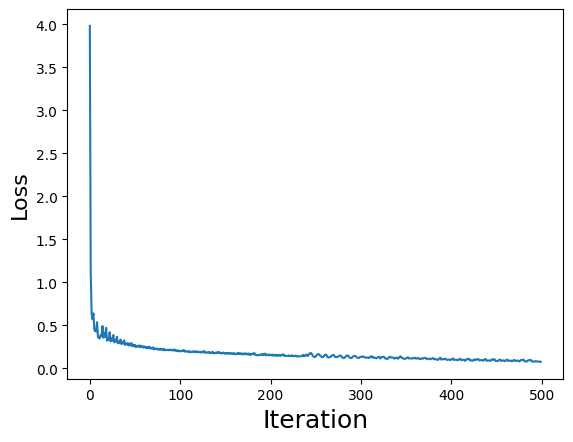

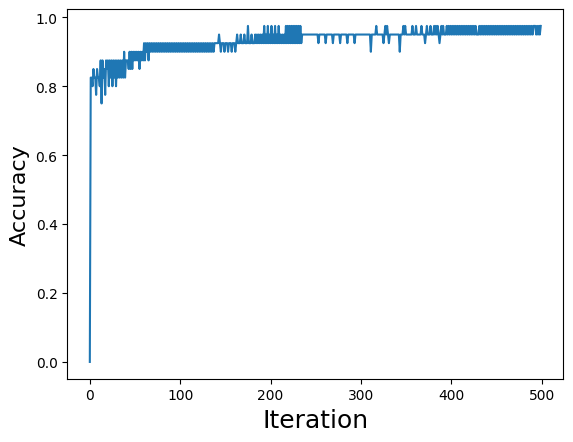

In [ ]:
## Initialize MLP with Given Parameters
mlp_model = MLP([nin, 40, nout])

## Train the MLP
train(x, y, mlp_model)

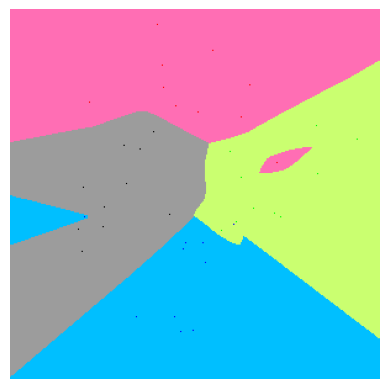

In [ ]:
## Visualize Decision Boundaries
visualization(X, Y, mlp_model)

## Acknowledgement

The design of the auto grade structure are based on the work https://github.com/karpathy/micrograd